<a href="https://colab.research.google.com/github/rilschultz/CS167Notes/blob/main/Notebook6_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \# 6
Name:
Date:

## Problem Description:



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


Number 1 State the Problem

For this notebook the problem is to create CNN's to predict based on images whether a patient has pneumonia or not. This is done by training the models on a train set of images and then choosing how and how long the models are training for. The goal is to understand parameters and how tuning them affects the models accuracy for both train and test data.

In [5]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/datasets/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/datasets/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [7]:
# Build your CNN here
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=8, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/8


<ipython-input-8-8833cba9acf9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results = model.fit_generator(


163/163 [==============================] - 23s 111ms/step - loss: 0.3330 - accuracy: 0.8683 - val_loss: 1.1790 - val_accuracy: 0.6843
Epoch 2/8
163/163 [==============================] - 18s 112ms/step - loss: 0.1593 - accuracy: 0.9365 - val_loss: 0.9249 - val_accuracy: 0.7308
Epoch 3/8
163/163 [==============================] - 18s 110ms/step - loss: 0.1422 - accuracy: 0.9477 - val_loss: 0.7386 - val_accuracy: 0.7612
Epoch 4/8
163/163 [==============================] - 19s 118ms/step - loss: 0.1202 - accuracy: 0.9519 - val_loss: 0.8338 - val_accuracy: 0.7548
Epoch 5/8
163/163 [==============================] - 19s 117ms/step - loss: 0.1181 - accuracy: 0.9569 - val_loss: 0.8249 - val_accuracy: 0.7548
Epoch 6/8
163/163 [==============================] - 18s 107ms/step - loss: 0.1106 - accuracy: 0.9578 - val_loss: 0.9962 - val_accuracy: 0.7436
Epoch 7/8
163/163 [==============================] - 17s 106ms/step - loss: 0.1118 - accuracy: 0.9592 - val_loss: 1.0556 - val_accuracy: 0.7276
Ep

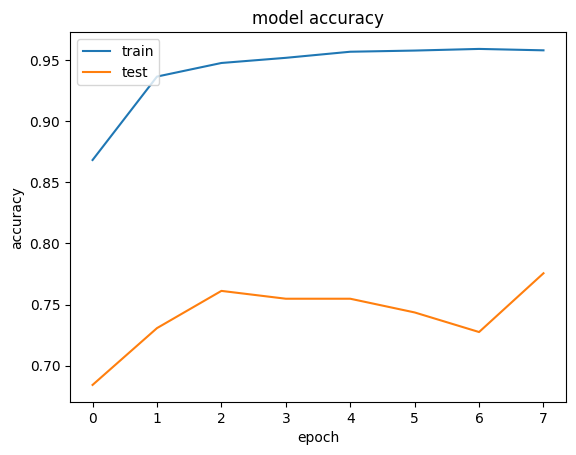

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
#We'll try a second model, this time with pooling layers after each convolutional layer
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=8, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/8


<ipython-input-11-8eba36e0fe5a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results2 = model2.fit_generator(


163/163 [==============================] - 18s 106ms/step - loss: 0.4192 - accuracy: 0.8089 - val_loss: 0.3656 - val_accuracy: 0.8269
Epoch 2/8
163/163 [==============================] - 17s 102ms/step - loss: 0.2153 - accuracy: 0.9107 - val_loss: 0.4790 - val_accuracy: 0.7869
Epoch 3/8
163/163 [==============================] - 16s 101ms/step - loss: 0.1536 - accuracy: 0.9383 - val_loss: 0.5696 - val_accuracy: 0.7788
Epoch 4/8
163/163 [==============================] - 18s 108ms/step - loss: 0.1371 - accuracy: 0.9465 - val_loss: 0.4500 - val_accuracy: 0.8061
Epoch 5/8
163/163 [==============================] - 16s 100ms/step - loss: 0.1427 - accuracy: 0.9423 - val_loss: 0.6045 - val_accuracy: 0.7885
Epoch 6/8
163/163 [==============================] - 17s 101ms/step - loss: 0.1258 - accuracy: 0.9494 - val_loss: 0.8523 - val_accuracy: 0.7452
Epoch 7/8
163/163 [==============================] - 16s 99ms/step - loss: 0.1304 - accuracy: 0.9500 - val_loss: 0.8354 - val_accuracy: 0.7484
Epo

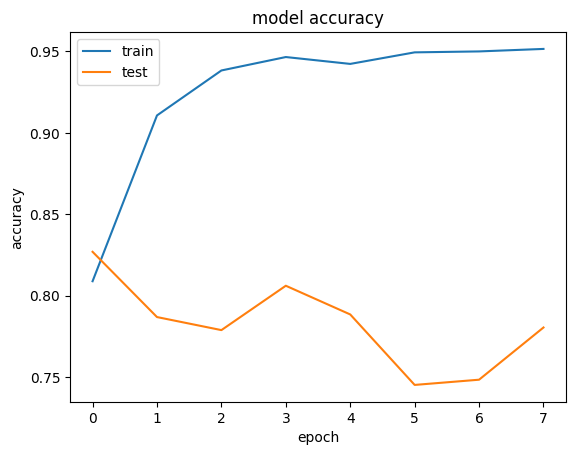

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

By creating the model without the pooling steps there was a lower accuracy and longer runtime, when adding in the pooling steps it helped reduce time dramitically and increase accuracy while also helping with validation accuracy among more epochs

In [43]:
model3 = Sequential()
model3.add(Conv2D(32, (4, 4), activation = 'relu', input_shape=(img_width, img_height, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(2, 2))

model3.add(Conv2D(64, (3, 3),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(64,activation = 'relu'))
model3.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.95)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
training_results3 = model3.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=9, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/9


<ipython-input-44-5937264244f9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training_results3 = model3.fit_generator(


163/163 [==============================] - 17s 102ms/step - loss: 0.4563 - accuracy: 0.8020 - val_loss: 0.3947 - val_accuracy: 0.8253
Epoch 2/9
163/163 [==============================] - 17s 105ms/step - loss: 0.2160 - accuracy: 0.9132 - val_loss: 0.4632 - val_accuracy: 0.7949
Epoch 3/9
163/163 [==============================] - 17s 107ms/step - loss: 0.1963 - accuracy: 0.9239 - val_loss: 1.3608 - val_accuracy: 0.6795
Epoch 4/9
163/163 [==============================] - 16s 100ms/step - loss: 0.1434 - accuracy: 0.9433 - val_loss: 1.0234 - val_accuracy: 0.7019
Epoch 5/9
163/163 [==============================] - 16s 101ms/step - loss: 0.1353 - accuracy: 0.9467 - val_loss: 0.5560 - val_accuracy: 0.7901
Epoch 6/9
163/163 [==============================] - 16s 99ms/step - loss: 0.1206 - accuracy: 0.9572 - val_loss: 1.0281 - val_accuracy: 0.7115
Epoch 7/9
163/163 [==============================] - 17s 107ms/step - loss: 0.1039 - accuracy: 0.9605 - val_loss: 0.8071 - val_accuracy: 0.7676
Epo

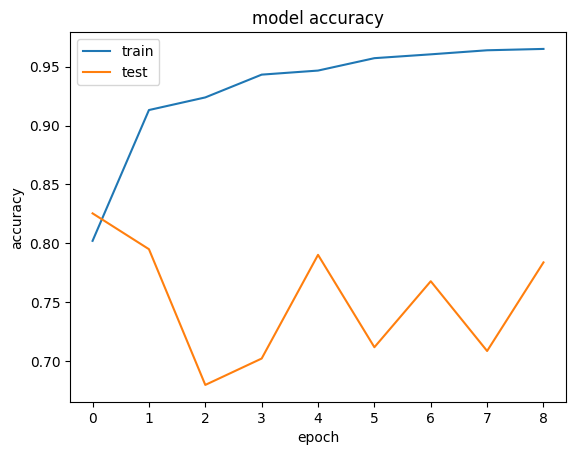

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results3.history['accuracy'])
plt.plot(training_results3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

While tuning the parameters I tried many different ideas such as tuning the filtered images to 4x4 instead of 3x3 I just wanted to see how this affected the results and it ended up having a small positive increase so I kept it and went on to the next parameter which was pool size I decided to keep it at 2, 2 after changing it to 3, 3 and it doing worse. Then i changed the amount of filters from 32 to 64 in one of the conv layers and then added another layer, this all helped a little. I feel that these changes were more helpful than before because of the fact that the test accuracy is more consistant and not decreasing after the initial epochs. This model shows high accuracy in the train data, as well as over 75% accuracy on the test data of correctly identifying based on a single xray if a patient has pneumonia. 